# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [70]:
params={
    "criterion":['gini','entropy', 'log_loss'],
    "max_depth":list(range(2,50)),
    "min_samples_split":list(range(2,50)),
    "min_samples_leaf":list(range(2,50)),
    "n_estimators":list(range(100,1000,25)),
    
}

In [71]:
# Add model training in here!
model = RandomForestClassifier() # Add parameters to the model!
#model.fit() # Complete this method call!

## Cross Validation

In [72]:
rs=RandomizedSearchCV(model,params,cv=10)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20, 21, 22,
                                                             23, 24, 25, 26, 27,
                                                             28, 29, 30, 31, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20,
                                                              21, 22, 23, 24,
                                                              25, 26, 27, 28,
                                                              29, 30, 31, ...],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200, 225, 250, 275,
                                                         300, 325, 350, 375,
                                                         400, 425, 450, 475,
                                                         500, 525, 550, 575,
                                                         600, 625, 650, 675,
                                                         700, 725, 750, 775,
                                                         800, 825, ...]})

In [73]:
pred=rs.predict(X_test)
print(f"Best Score is:",rs.best_score_)
print(f"Accuracy score on test set is: ",accuracy_score(y_test,pred))
print(f"Best estimator is:",rs.best_estimator_)

Best Score is: 0.9035970569609704
Accuracy score on test set is:  0.9041621029572837
Best estimator is: RandomForestClassifier(criterion='log_loss', max_depth=27, min_samples_leaf=8,
                       n_estimators=150)


# so here we will train our random forest classifier with the best estimator paramentors.

In [75]:
random_f_model=RandomForestClassifier(criterion='log_loss', max_depth=27, min_samples_leaf=8,
                       n_estimators=150,oob_score=True)
random_f_model.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=27, min_samples_leaf=8,
                       n_estimators=150, oob_score=True)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [76]:
# Generate predictions here!
prediction=random_f_model.predict(X_test)

# The above random forest model has a  `90 %` prediction accuracy on the test set.

In [77]:
# Calculate performance metrics here!
print(accuracy_score(y_test,prediction))

0.9036144578313253


# To check the model is overfitted we can use out of bag score. so it has similar value with the test set accutracy, so that the model has generalized well.

In [78]:
# out of bag score
print(random_f_model.oob_score_)

0.903505568742012


# Confusion Matrix and Classification Report.

In [79]:
confusion_matrix(y_test,prediction)

array([[3297,    0],
       [ 352,    3]], dtype=int64)

In [80]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3297
           1       1.00      0.01      0.02       355

    accuracy                           0.90      3652
   macro avg       0.95      0.50      0.48      3652
weighted avg       0.91      0.90      0.86      3652



# `Feature Importance `

In [81]:
feature_impo = pd.DataFrame({
    'feat': X_train.columns,
    'imp': random_f_model.feature_importances_
}).sort_values(by='imp', ascending=True).reset_index()


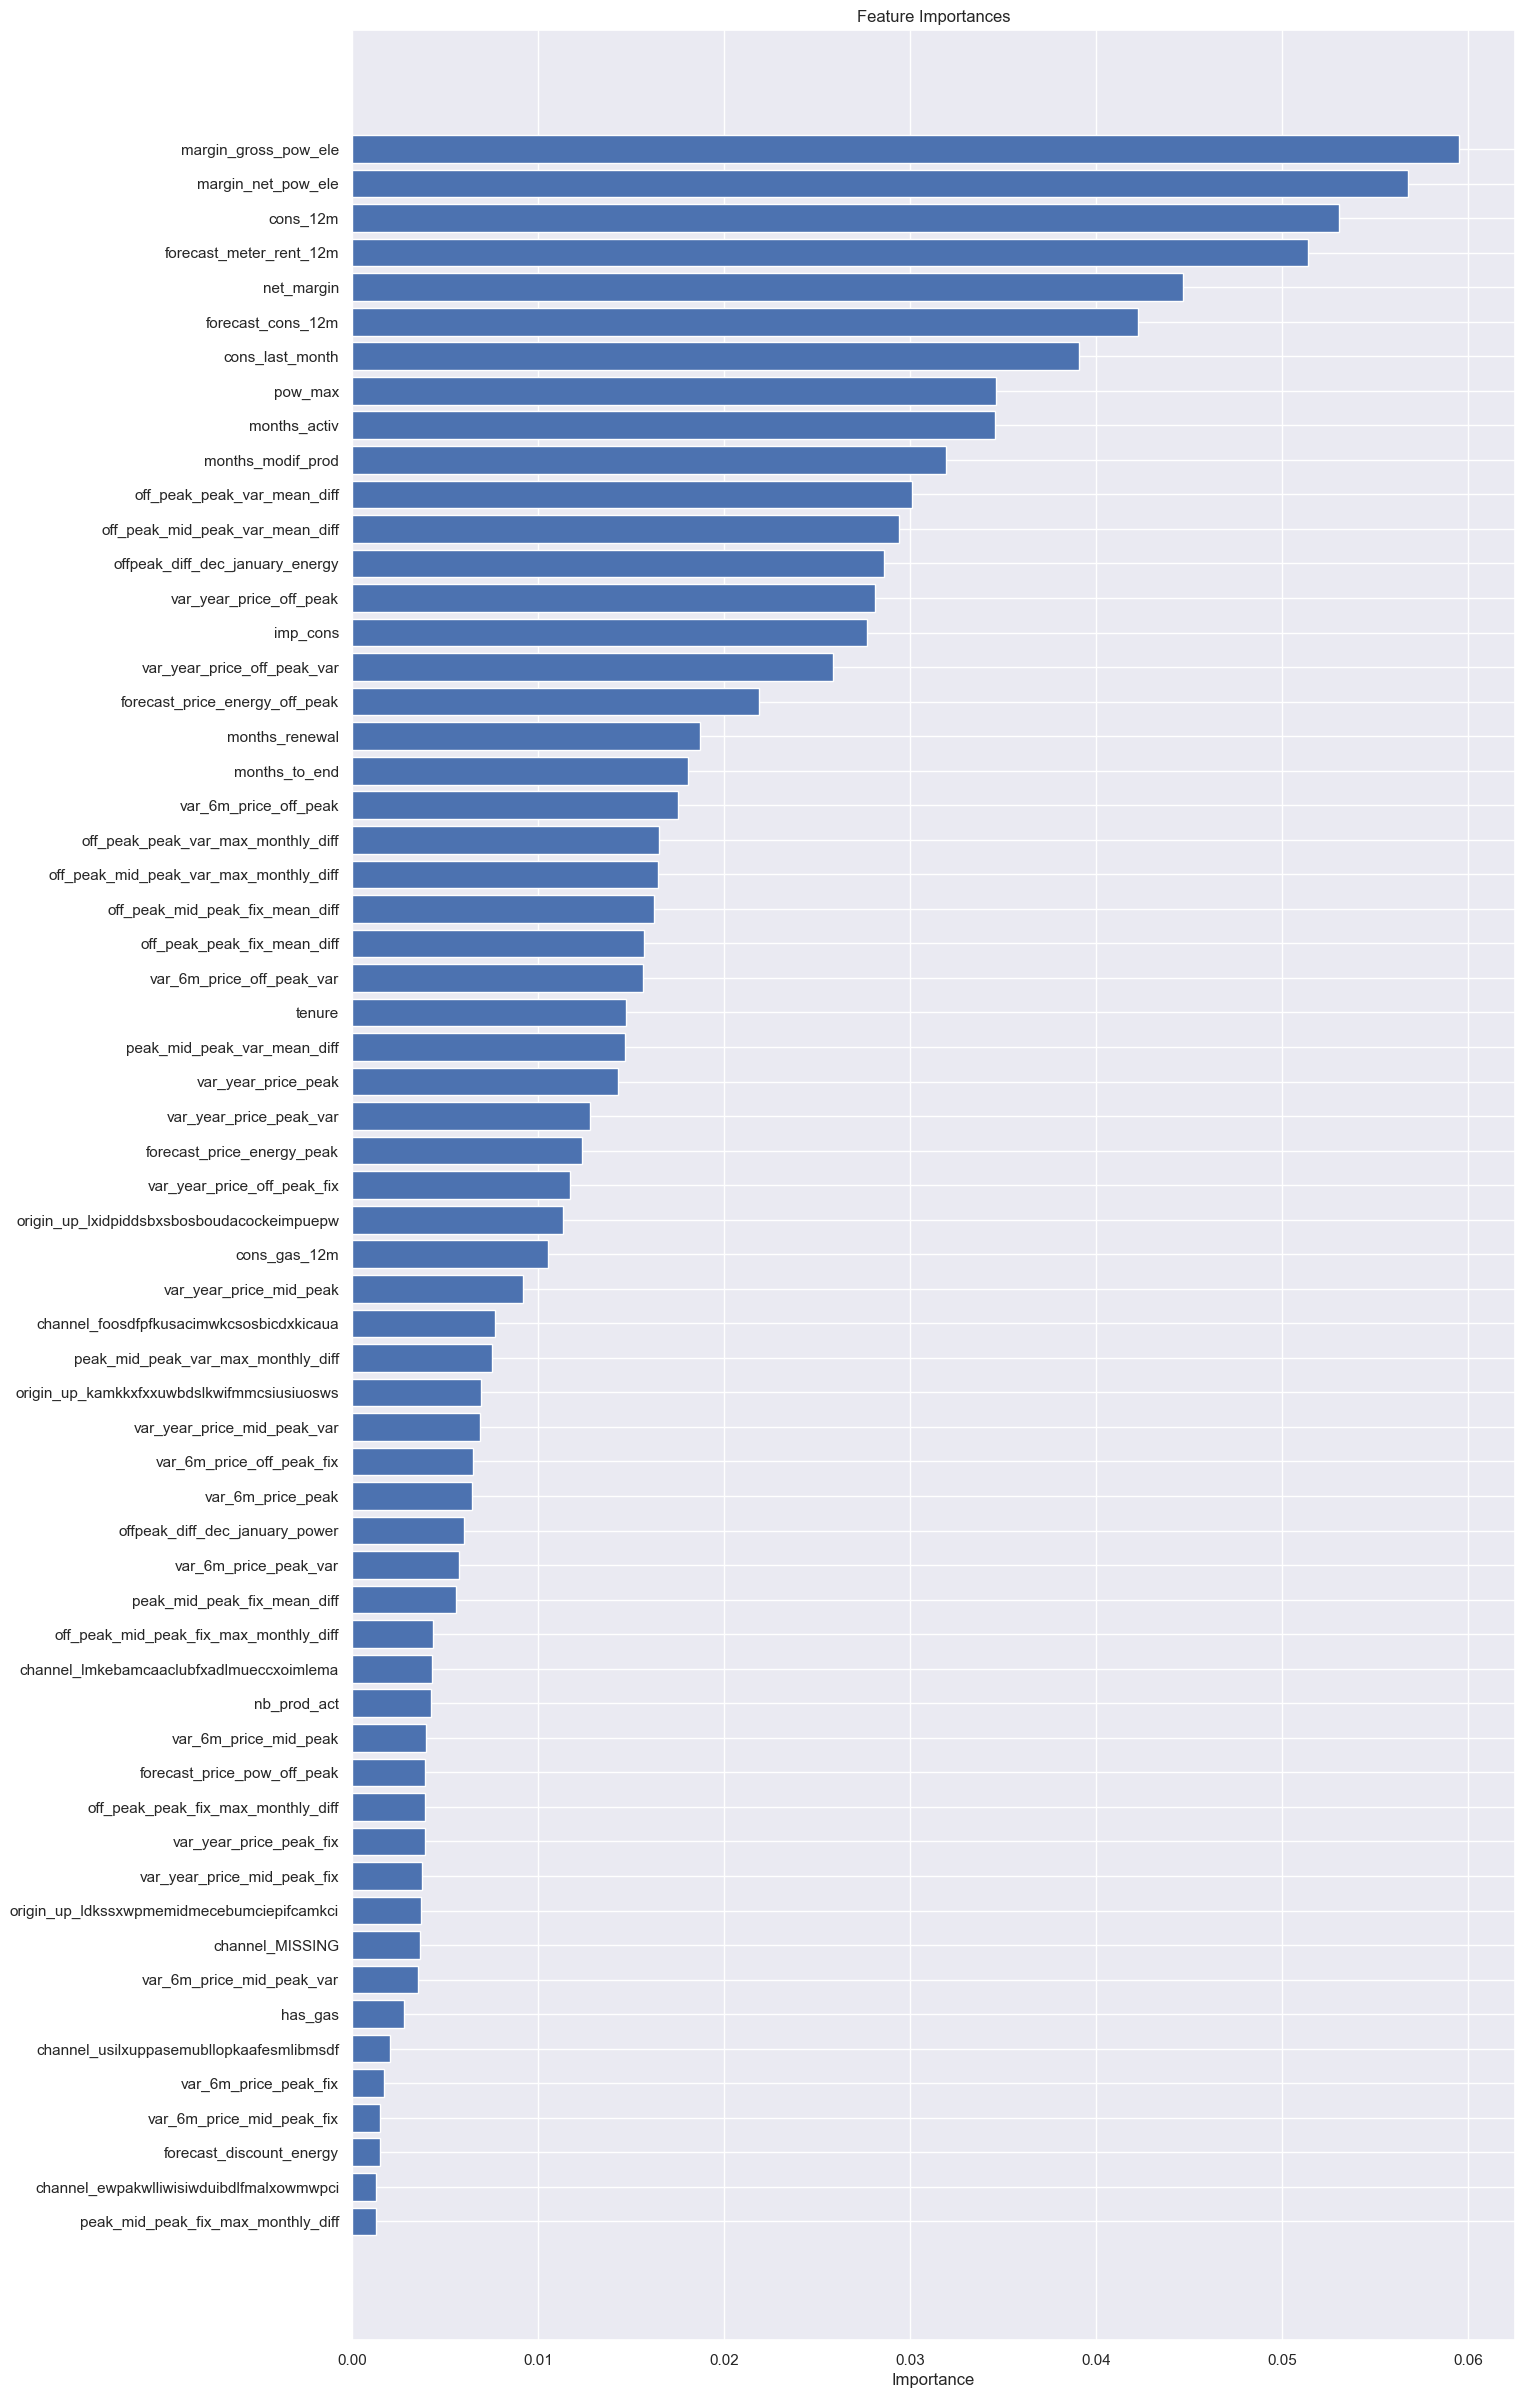

In [82]:
plt.figure(figsize=(15, 30))
plt.title('Feature Importances')
plt.barh(range(len(feature_impo)), feature_impo['imp'], color='b', align='center')
plt.yticks(range(len(feature_impo)), feature_impo['feat'])
plt.xlabel('Importance')
plt.show()

## `CONCLUSION`

 Based on the above out put on the confusion matrix and classification report, the model has predicted non churn customers very well and has predicted poor on churn customers.  
- To better understand the model,  it has predicted `3300` correct predictions and `352` wrong predictions. 

- `3297` out of `3297` customers are predicted `non churn` which is correct and `3` out of `355` are predicted `churned` while the rest `352` are also `churn`, which shows poor performance to predict churn customers.

- Looking on the classification report we have a good score  on precision revealing the good prediction accuracy on `non churned` customers while recall score is very low and revealed the poorness of the model to predict `chuned` customers.

- Looking the feature importance by the random forest's `feature_importance_` method we found that price features has no predictive power while features like `margin gross pow ele` and `margin net pow ele ` has high predictive power.

- `OVERALL:` the model has very good performance on predicting `non churn` customers while having poor accuracy predicting `churn` customers, there-withal we can conclude that customer `churn is not driven by price` based on the feature importance.

- `SUGGESTION: ` it is possible to improve the model using different sampling methods like `sklearn random sampler`  and also using other ensemble models and deep experiment to analyze churn driven by price hypothesis. 



# `PREDICTED RESULTS`

In [93]:
pred_vals=pd.DataFrame({"predicted_values":prediction,"actual_classes":y_test}).reset_index().drop("index",axis=1)
pred_vals.to_csv("predicted_results_from_random_forest.csv")